In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
file_path = r"C:\Users\Aksystems\Downloads\dissolution_rate_samples.xlsx"

# Read the file (no encoding needed for xlsx files)
tablets_data = pd.read_excel(file_path, engine="openpyxl")     

In [3]:
tablets_data

,Particle Size (µm),Drug Form,pH-Dependent Solubility,Log P (Lipophilicity Index),Disintegrant (%),Binder (%),Filler Type,Surfactant (%),Tablet Hardness (kg/cm²),Lubricant (%),...,Coating Thickness (%),Granulation Type,Compression Force (kN),Drying Temperature (°C),Mixing Time (minutes),Gastric pH,Fluid Volume (mL),Gastric Emptying Rate,Food Effect,Dissolution Rate (%)
0,9.236658,Amorphous,pH 1-2,0.92,8.63,2.30,"Water-Soluble (MCC, Lactose)",0.21,3.86,0.36,...,1.83,Wet Granulation,7.85,59.59,11.50,1-2,267.82,Fast,Avoid High-Fat Meals,97.56
1,8.177825,Amorphous,pH 1-2,0.80,7.15,2.73,"Water-Soluble (MCC, Lactose)",0.33,3.78,0.32,...,1.58,Wet Granulation,5.33,58.29,13.98,1-2,252.79,Fast,Avoid High-Fat Meals,99.16
2,9.922958,Amorphous,pH 1-2,0.83,8.09,2.93,"Water-Soluble (MCC, Lactose)",0.40,4.69,0.41,...,1.61,Wet Granulation,8.99,55.16,10.69,1-2,287.37,Fast,Avoid High-Fat Meals,99.95
3,8.817306,Amorphous,pH 1-2,0.89,8.75,2.25,"Water-Soluble (MCC, Lactose)",0.23,3.40,0.44,...,1.60,Wet Granulation,8.21,56.51,14.28,1-2,280.46,Fast,Avoid High-Fat Meals,99.95
4,9.324606,Amorphous,pH 1-2,0.95,8.53,2.98,"Water-Soluble (MCC, Lactose)",0.40,4.01,0.33,...,1.97,Wet Granulation,5.22,56.09,10.88,1-2,297.81,Fast,Avoid High-Fat Meals,96.96
5,9.809649,Amorphous,pH 1-2,0.83,7.89,2.39,"Water-Soluble (MCC, Lactose)",0.25,3.67,0.44,...,1.82,Wet Granulation,9.13,59.54,13.08,1-2,264.62,Fast,Avoid High-Fat Meals,98.52
6,8.450169,Amorphous,pH 1-2,0.89,9.20,2.07,"Water-Soluble (MCC, Lactose)",0.47,3.32,0.42,...,1.52,Wet Granulation,7.35,56.59,14.02,1-2,255.04,Fast,Avoid High-Fat Meals,97.55
7,8.813821,Amorphous,pH 1-2,0.84,9.60,2.72,"Water-Soluble (MCC, Lactose)",0.28,3.21,0.34,...,1.60,Wet Granulation,9.58,56.00,12.82,1-2,268.61,Fast,Avoid High-Fat Meals,97.74
8,8.952925,Amorphous,pH 1-2,0.87,9.99,2.70,"Water-Soluble (MCC, Lactose)",0.37,3.60,0.36,...,1.80,Wet Granulation,6.77,59.88,12.54,1-2,269.94,Fast,Avoid High-Fat Meals,96.70
9,9.566322,Amorphous,pH 1-2,0.86,7.62,2.87,"Water-Soluble (MCC, Lactose)",0.48,4.14,0.43,...,1.80,Wet Granulation,9.26,56.53,13.98,1-2,286.36,Fast,Avoid High-Fat Meals,99.30


In [4]:
tablets_data.shape

(40, 21)

In [5]:
##preprocessing

In [6]:
tablets_data.isnull().sum()

Particle Size (µm)             0
Drug Form                      0
pH-Dependent Solubility        0
Log P (Lipophilicity Index)    0
Disintegrant (%)               0
Binder (%)                     0
Filler Type                    0
Surfactant (%)                 0
Tablet Hardness (kg/cm²)       0
Lubricant (%)                  0
Porosity (%)                   0
Coating Thickness (%)          0
Granulation Type               0
Compression Force (kN)         0
Drying Temperature (°C)        0
Mixing Time (minutes)          0
Gastric pH                     0
Fluid Volume (mL)              0
Gastric Emptying Rate          0
Food Effect                    0
Dissolution Rate (%)           0
dtype: int64

In [7]:
tablets_data.duplicated().sum()

np.int64(0)

In [8]:
tablets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Particle Size (µm)           40 non-null     float64
 1   Drug Form                    40 non-null     object 
 2   pH-Dependent Solubility      40 non-null     object 
 3   Log P (Lipophilicity Index)  40 non-null     float64
 4   Disintegrant (%)             40 non-null     float64
 5   Binder (%)                   40 non-null     float64
 6   Filler Type                  40 non-null     object 
 7   Surfactant (%)               40 non-null     float64
 8   Tablet Hardness (kg/cm²)     40 non-null     float64
 9   Lubricant (%)                40 non-null     float64
 10  Porosity (%)                 40 non-null     float64
 11  Coating Thickness (%)        40 non-null     float64
 12  Granulation Type             40 non-null     object 
 13  Compression Force (kN)

In [25]:
tablets_data['Drug Form'].replace(['Amorphous','Crystalline'],[1,2],inplace=True)
tablets_data['Filler Type'].replace(['Water-Soluble (MCC, Lactose)', 'Water-Insoluble (e.g., DCP)'],[1,2], inplace=True)
tablets_data['Granulation Type'].replace(['Wet Granulation' ,'Dry Granulation'],[1,2], inplace=True)
tablets_data['Gastric Emptying Rate'].replace(['Fast' ,'Slow'],[1,2], inplace=True)
tablets_data.drop(columns=['Food Effect'], inplace=True)

C:\Users\Aksystems\AppData\Local\Temp\ipykernel_7348\958414151.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tablets_data['Drug Form'].replace(['Amorphous','Crystalline'],[1,2],inplace=True)
C:\Users\Aksystems\AppData\Local\Temp\ipykernel_7348\958414151.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

In [26]:
tablets_data

,Particle Size (µm),Drug Form,Log P (Lipophilicity Index),Disintegrant (%),Binder (%),Filler Type,Surfactant (%),Tablet Hardness (kg/cm²),Lubricant (%),Porosity (%),Coating Thickness (%),Granulation Type,Compression Force (kN),Drying Temperature (°C),Mixing Time (minutes),Fluid Volume (mL),Gastric Emptying Rate,Dissolution Rate (%)
0,9.236658,1,0.92,8.63,2.30,1,0.21,3.86,0.36,13.58,1.83,1,7.85,59.59,11.50,267.82,1,97.56
1,8.177825,1,0.80,7.15,2.73,1,0.33,3.78,0.32,11.72,1.58,1,5.33,58.29,13.98,252.79,1,99.16
2,9.922958,1,0.83,8.09,2.93,1,0.40,4.69,0.41,11.61,1.61,1,8.99,55.16,10.69,287.37,1,99.95
3,8.817306,1,0.89,8.75,2.25,1,0.23,3.40,0.44,14.96,1.60,1,8.21,56.51,14.28,280.46,1,99.95
4,9.324606,1,0.95,8.53,2.98,1,0.40,4.01,0.33,13.72,1.97,1,5.22,56.09,10.88,297.81,1,96.96
5,9.809649,1,0.83,7.89,2.39,1,0.25,3.67,0.44,11.60,1.82,1,9.13,59.54,13.08,264.62,1,98.52
6,8.450169,1,0.89,9.20,2.07,1,0.47,3.32,0.42,12.88,1.52,1,7.35,56.59,14.02,255.04,1,97.55
7,8.813821,1,0.84,9.60,2.72,1,0.28,3.21,0.34,11.99,1.60,1,9.58,56.00,12.82,268.61,1,97.74
8,8.952925,1,0.87,9.99,2.70,1,0.37,3.60,0.36,13.93,1.80,1,6.77,59.88,12.54,269.94,1,96.70
9,9.566322,1,0.86,7.62,2.87,1,0.48,4.14,0.43,11.19,1.80,1,9.26,56.53,13.98,286.36,1,99.30


In [27]:
tablets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Particle Size (µm)           40 non-null     float64
 1   Drug Form                    40 non-null     int64  
 2   Log P (Lipophilicity Index)  40 non-null     float64
 3   Disintegrant (%)             40 non-null     float64
 4   Binder (%)                   40 non-null     float64
 5   Filler Type                  40 non-null     int64  
 6   Surfactant (%)               40 non-null     float64
 7   Tablet Hardness (kg/cm²)     40 non-null     float64
 8   Lubricant (%)                40 non-null     float64
 9   Porosity (%)                 40 non-null     float64
 10  Coating Thickness (%)        40 non-null     float64
 11  Granulation Type             40 non-null     int64  
 12  Compression Force (kN)       40 non-null     float64
 13  Drying Temperature (°C

In [79]:
input_data=tablets_data.drop(columns=['Dissolution Rate (%)'])

In [80]:
output_data=tablets_data['Dissolution Rate (%)']

In [81]:
input_data.head()

,Particle Size (µm),Drug Form,Log P (Lipophilicity Index),Disintegrant (%),Binder (%),Filler Type,Surfactant (%),Tablet Hardness (kg/cm²),Lubricant (%),Porosity (%),Coating Thickness (%),Granulation Type,Compression Force (kN),Drying Temperature (°C),Mixing Time (minutes),Fluid Volume (mL),Gastric Emptying Rate,Predictions
0,9.236658,1,0.92,8.63,2.30,1,0.21,3.86,0.36,13.58,1.83,1,7.85,59.59,11.50,267.82,1,97.219149
1,8.177825,1,0.80,7.15,2.73,1,0.33,3.78,0.32,11.72,1.58,1,5.33,58.29,13.98,252.79,1,98.989512
2,9.922958,1,0.83,8.09,2.93,1,0.40,4.69,0.41,11.61,1.61,1,8.99,55.16,10.69,287.37,1,99.514444
3,8.817306,1,0.89,8.75,2.25,1,0.23,3.40,0.44,14.96,1.60,1,8.21,56.51,14.28,280.46,1,96.901692
4,9.324606,1,0.95,8.53,2.98,1,0.40,4.01,0.33,13.72,1.97,1,5.22,56.09,10.88,297.81,1,98.155646


In [82]:
x_train, x_test, y_train, y_test= train_test_split(input_data, output_data, test_size=0.2)

In [83]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {'n_estimators': [100, 200],'max_depth': [10, 20, None],'min_samples_split': [2, 5],'min_samples_leaf': [1, 2],'random_state': [42] }

grid_search = GridSearchCV(estimator=model(), param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error')
grid_search.fit(x_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200], 'random_state': [42]},
             scoring='neg_mean_absolute_error')

In [101]:
y_pred=grid_search.predict(x_test)

In [102]:
y_pred

array([92.1081, 97.5645, 98.5909, 97.3753, 90.3755, 97.5385, 89.9683,
       98.4599])

In [49]:
x_train.head(1)

,Particle Size (µm),Drug Form,Log P (Lipophilicity Index),Disintegrant (%),Binder (%),Filler Type,Surfactant (%),Tablet Hardness (kg/cm²),Lubricant (%),Porosity (%),Coating Thickness (%),Granulation Type,Compression Force (kN),Drying Temperature (°C),Mixing Time (minutes),Fluid Volume (mL),Gastric Emptying Rate
27,8.93717,2,0.99,4.36,4.51,2,0.0,6.28,0.66,5.92,2.8,2,12.21,68.49,16.72,210.16,2


In [59]:
input_data_model = pd.DataFrame([[8.93717,2,0.99,4.36,4.51,2 ,0.0 ,6.28,0.66,5.92,2.8,2,12.21,68.49,16.72,210.16,2]], columns=['Particle Size (µm)' 	,'Drug Form' 	,'Log P (Lipophilicity Index)' 	,'Disintegrant (%)' 	,'Binder (%)' 	,'Filler Type' 	,'Surfactant (%)' 	,'Tablet Hardness (kg/cm²)' 	,'Lubricant (%)' 	,'Porosity (%)' 	,'Coating Thickness (%)'	,'Granulation Type' 	,'Compression Force (kN)' 	,'Drying Temperature (°C)' 	,'Mixing Time (minutes)' 	,'Fluid Volume (mL)' 	,'Gastric Emptying Rate'])

In [60]:
input_data_model

,Particle Size (µm),Drug Form,Log P (Lipophilicity Index),Disintegrant (%),Binder (%),Filler Type,Surfactant (%),Tablet Hardness (kg/cm²),Lubricant (%),Porosity (%),Coating Thickness (%),Granulation Type,Compression Force (kN),Drying Temperature (°C),Mixing Time (minutes),Fluid Volume (mL),Gastric Emptying Rate
0,8.93717,2,0.99,4.36,4.51,2,0.0,6.28,0.66,5.92,2.8,2,12.21,68.49,16.72,210.16,2


In [64]:
grid_search.predict(input_data_model)

array([91.33938917])

In [103]:
# Ensure your test set and true values have matching sizes
print(len(x_test), len(y_test))

# Make predictions on those 2 test samples
y_pred = grid_search.predict(x_test)

# Now calculate accuracy metrics
from sklearn.metrics import r2_score, mean_absolute_error

print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

8 8
R²: 0.9053715358077095
MAE: 0.9433499999999864


In [104]:
r2_score(y_test,y_pred)

0.9053715358077095


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


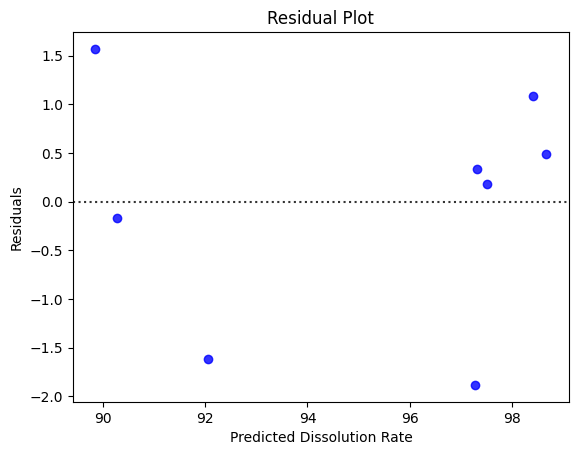

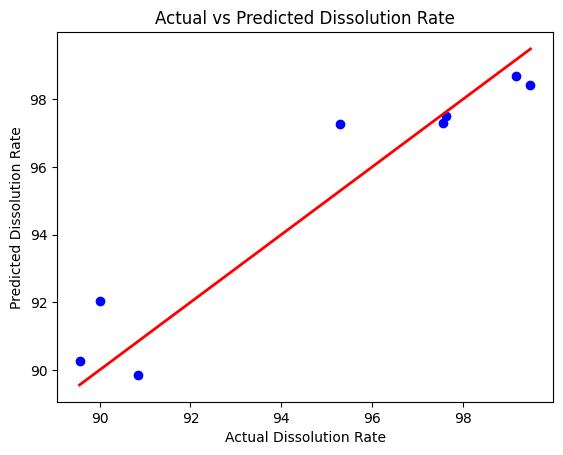

In [89]:
!pip install statsmodels
import matplotlib.pyplot as plt
import seaborn as sns
residuals = y_test - y_pred
# Residual Plot without lowess
sns.residplot(x=y_pred, y=residuals, color='blue', line_kws={'color': 'red'})
plt.title('Residual Plot')
plt.xlabel('Predicted Dissolution Rate')
plt.ylabel('Residuals')
plt.show()
# Plotting the predicted vs actual values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted Dissolution Rate')
plt.xlabel('Actual Dissolution Rate')
plt.ylabel('Predicted Dissolution Rate')
plt.show()

In [90]:
tablets_data

,Particle Size (µm),Drug Form,Log P (Lipophilicity Index),Disintegrant (%),Binder (%),Filler Type,Surfactant (%),Tablet Hardness (kg/cm²),Lubricant (%),Porosity (%),Coating Thickness (%),Granulation Type,Compression Force (kN),Drying Temperature (°C),Mixing Time (minutes),Fluid Volume (mL),Gastric Emptying Rate,Dissolution Rate (%),Predictions
0,9.236658,1,0.92,8.63,2.30,1,0.21,3.86,0.36,13.58,1.83,1,7.85,59.59,11.50,267.82,1,97.56,97.219149
1,8.177825,1,0.80,7.15,2.73,1,0.33,3.78,0.32,11.72,1.58,1,5.33,58.29,13.98,252.79,1,99.16,98.989512
2,9.922958,1,0.83,8.09,2.93,1,0.40,4.69,0.41,11.61,1.61,1,8.99,55.16,10.69,287.37,1,99.95,99.514444
3,8.817306,1,0.89,8.75,2.25,1,0.23,3.40,0.44,14.96,1.60,1,8.21,56.51,14.28,280.46,1,99.95,96.901692
4,9.324606,1,0.95,8.53,2.98,1,0.40,4.01,0.33,13.72,1.97,1,5.22,56.09,10.88,297.81,1,96.96,98.155646
5,9.809649,1,0.83,7.89,2.39,1,0.25,3.67,0.44,11.60,1.82,1,9.13,59.54,13.08,264.62,1,98.52,99.112271
6,8.450169,1,0.89,9.20,2.07,1,0.47,3.32,0.42,12.88,1.52,1,7.35,56.59,14.02,255.04,1,97.55,97.077184
7,8.813821,1,0.84,9.60,2.72,1,0.28,3.21,0.34,11.99,1.60,1,9.58,56.00,12.82,268.61,1,97.74,97.218755
8,8.952925,1,0.87,9.99,2.70,1,0.37,3.60,0.36,13.93,1.80,1,6.77,59.88,12.54,269.94,1,96.70,96.979156
9,9.566322,1,0.86,7.62,2.87,1,0.48,4.14,0.43,11.19,1.80,1,9.26,56.53,13.98,286.36,1,99.30,99.116932


In [107]:
tablets_data.insert(18, "Predictionss", grid_search.predict(input_data))

In [108]:
tablets_data

,Particle Size (µm),Drug Form,Log P (Lipophilicity Index),Disintegrant (%),Binder (%),Filler Type,Surfactant (%),Tablet Hardness (kg/cm²),Lubricant (%),Porosity (%),...,Granulation Type,Compression Force (kN),Drying Temperature (°C),Mixing Time (minutes),Fluid Volume (mL),Gastric Emptying Rate,Dissolution Rate (%),Predictionss,Prediction,Predictions
0,9.236658,1,0.92,8.63,2.30,1,0.21,3.86,0.36,13.58,...,1,7.85,59.59,11.50,267.82,1,97.56,97.5136,97.48395,97.219149
1,8.177825,1,0.80,7.15,2.73,1,0.33,3.78,0.32,11.72,...,1,5.33,58.29,13.98,252.79,1,99.16,98.5909,98.66675,98.989512
2,9.922958,1,0.83,8.09,2.93,1,0.40,4.69,0.41,11.61,...,1,8.99,55.16,10.69,287.37,1,99.95,99.4927,99.57770,99.514444
3,8.817306,1,0.89,8.75,2.25,1,0.23,3.40,0.44,14.96,...,1,8.21,56.51,14.28,280.46,1,99.95,99.0150,98.76870,96.901692
4,9.324606,1,0.95,8.53,2.98,1,0.40,4.01,0.33,13.72,...,1,5.22,56.09,10.88,297.81,1,96.96,97.4953,97.47235,98.155646
5,9.809649,1,0.83,7.89,2.39,1,0.25,3.67,0.44,11.60,...,1,9.13,59.54,13.08,264.62,1,98.52,98.6080,98.64195,99.112271
6,8.450169,1,0.89,9.20,2.07,1,0.47,3.32,0.42,12.88,...,1,7.35,56.59,14.02,255.04,1,97.55,97.5385,97.30230,97.077184
7,8.813821,1,0.84,9.60,2.72,1,0.28,3.21,0.34,11.99,...,1,9.58,56.00,12.82,268.61,1,97.74,97.9697,97.73235,97.218755
8,8.952925,1,0.87,9.99,2.70,1,0.37,3.60,0.36,13.93,...,1,6.77,59.88,12.54,269.94,1,96.70,97.1526,97.04955,96.979156
9,9.566322,1,0.86,7.62,2.87,1,0.48,4.14,0.43,11.19,...,1,9.26,56.53,13.98,286.36,1,99.30,98.9803,99.05785,99.116932


In [109]:
import pickle

In [110]:
import joblib
joblib.dump(model, 'modell.pkl')


['modell.pkl']